### Dataset contenet & explanations 
###### File - spam_ham_dataset.csv

|Feature & Label name|Explanation|
|:--|:--|  
|label|spam or ham|
|text|the text which can be spam or ham|
|label_num|spam:1, ham:0|

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname,filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
spam_df = pd.read_csv('spam_ham_dataset.csv', index_col='Unnamed: 0') 
#sort index 
spam_df_sorted = spam_df.sort_index()
spam_df_sorted

,label,text,label_num
0,ham,Subject: christmas tree farm pictures\r\n,0
1,ham,"Subject: vastar resources , inc .\r\ngary , pr...",0
2,ham,Subject: calpine daily gas nomination\r\n- cal...,0
3,ham,Subject: re : issue\r\nfyi - see note below - ...,0
4,ham,Subject: meter 7268 nov allocation\r\nfyi .\r\...,0
...,...,...,...
5166,spam,Subject: our pro - forma invoice attached\r\nd...,1
5167,spam,Subject: str _ rndlen ( 2 - 4 ) } { extra _ ti...,1
5168,spam,Subject: check me out !\r\n61 bb\r\nhey derm\r...,1
5169,spam,Subject: hot jobs\r\nglobal marketing specialt...,1


In [ ]:
print("Size : ",spam_df_sorted.shape)
spam_df_sorted.info()

Size :  (5171, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


### Exploratory Data Analysis (EDA)

In [ ]:
spam_df_sorted.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
spam_df_sorted.isnull().sum() #no null values

label        0
text         0
label_num    0
dtype: int64

In [ ]:
# Checking Numerical Columns
spam_df_sorted.columns[(spam_df_sorted.dtypes !='object').values].tolist() 

['label_num']

In [ ]:
print("Total items shape: ", spam_df_sorted.shape)
print("Unique items shape: ",spam_df_sorted.drop_duplicates().shape)

Total items shape:  (5171, 3)
Unique items shape:  (4993, 3)


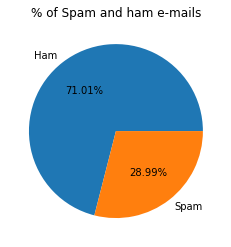

In [ ]:
# This graph shows that, majority of the emails are hams; Data imabalanced
plt.pie(spam_df_sorted['label'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.2f%%')
plt.title('% of Spam and ham e-mails')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


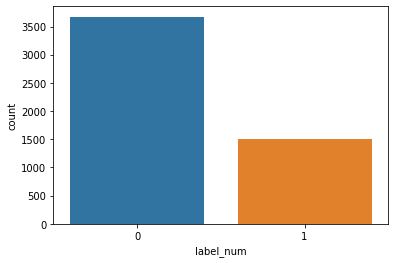

In [ ]:
#Actual figure 
sns.countplot(spam_df_sorted.label_num)

In [ ]:
repeated_text = []
repeated_occurence = []
for content, occurence in spam_df_sorted.text.value_counts().items():
    repeated_text.append(content)
    repeated_occurence.append(occurence)

In [ ]:
text_occurence = pd.DataFrame({"Text": repeated_text, "Frequency": repeated_occurence})
# text_occurence_sort = text_occurence.sort_values('Frequency')
# text_occurence_sort

In [ ]:
#most repeated emails out of the unique texts
print(r"most repeated text: {} its label :{}".format(text_occurence.iloc[text_occurence.Frequency.argmax()], spam_df_sorted.iloc[text_occurence.Frequency.argmax()]['label']))

most repeated text: Text         Subject: calpine daily gas nomination\r\n>\r\n...
Frequency                                                   20
Name: 0, dtype: object its label :ham


### Clean Dataset

In [ ]:
#The emails contain special characters other than alphabets, this migh be a problem in the later 
from nltk.tokenize import RegexpTokenizer
def clean_text(text, reg = RegexpTokenizer(r'[a-z]+')):
    text = text.lower()
    tokens = reg.tokenize(text)
    return " ".join(tokens)

In [ ]:
spam_df_sorted['text_clean'] = spam_df_sorted['text'].apply(clean_text)

In [ ]:
spam_df_sorted

,label,text,label_num,text_clean
0,ham,Subject: christmas tree farm pictures\r\n,0,subject christmas tree farm pictures
1,ham,"Subject: vastar resources , inc .\r\ngary , pr...",0,subject vastar resources inc gary production f...
2,ham,Subject: calpine daily gas nomination\r\n- cal...,0,subject calpine daily gas nomination calpine d...
3,ham,Subject: re : issue\r\nfyi - see note below - ...,0,subject re issue fyi see note below already do...
4,ham,Subject: meter 7268 nov allocation\r\nfyi .\r\...,0,subject meter nov allocation fyi forwarded by ...
...,...,...,...,...
5166,spam,Subject: our pro - forma invoice attached\r\nd...,1,subject our pro forma invoice attached divide ...
5167,spam,Subject: str _ rndlen ( 2 - 4 ) } { extra _ ti...,1,subject str rndlen extra time word bodyhtml
5168,spam,Subject: check me out !\r\n61 bb\r\nhey derm\r...,1,subject check me out bb hey derm bbbbb check o...
5169,spam,Subject: hot jobs\r\nglobal marketing specialt...,1,subject hot jobs global marketing specialties ...


In [ ]:
#drop 'text' and 'label' columns ,and duplicate rows after that 
spam_clean_df = spam_df_sorted.drop(['text','label'], axis=1)
spam_clean_final_df = spam_clean_df.drop_duplicates()
spam_clean_final_df

,label_num,text_clean
0,0,subject christmas tree farm pictures
1,0,subject vastar resources inc gary production f...
2,0,subject calpine daily gas nomination calpine d...
3,0,subject re issue fyi see note below already do...
4,0,subject meter nov allocation fyi forwarded by ...
...,...,...
5166,1,subject our pro forma invoice attached divide ...
5167,1,subject str rndlen extra time word bodyhtml
5168,1,subject check me out bb hey derm bbbbb check o...
5169,1,subject hot jobs global marketing specialties ...


In [ ]:
print(r"We have {} unique data points after cleaning!".format(spam_clean_final_df.label_num.value_counts().sum()))

We have 4636 unique data points after cleaning!


In [ ]:
#The imbalance is still there after removing duplicataes 
spam_clean_final_df.label_num.value_counts()

0    3176
1    1460
Name: label_num, dtype: int64

In [ ]:
#CountVectorizer to encode the text mail, and using stop_words to reduce the features sowhat !
from sklearn.feature_extraction.text import CountVectorizer
"""Stopwords are the words in any language which does not add much meaning to a sentence.
   They can safely be ignored without sacrificing the meaning of the sentence.
   And when building the vocabulary ignore terms that have a document
  frequency strictly higher than the given threshold 25 using min_df
"""
vectorizer = CountVectorizer(stop_words='english', min_df=25)
X = vectorizer.fit_transform(spam_clean_final_df['text_clean'])
#split target and feature
X = X.toarray()
y = spam_clean_final_df.label_num.values

In [ ]:
X.shape, y.shape #we have 45435 features for 4636 data items 

((4636, 2034), (4636,))

In [ ]:
#Visualize using violn plot 


In [ ]:
#to visualize the entire features in a tabel foramat
features_df = pd.DataFrame(data=X, columns = vectorizer.get_feature_names())
features_df.head()

,ability,able,accept,acceptance,access,according,accordingly,account,accountant,accounting,accounts,accuracy,accurate,achieve,acquisition,act,action,actions,active,activities,activity,acton,acts,actual,actually,actuals,ad,add,added,addition,additional,additionally,address,addressed,addresses,adjust,adjusted,adjustments,administration,adobe,...,williams,wilson,window,windows,winfree,wish,withers,woman,women,won,word,words,work,worked,working,works,worksheet,world,worldwide,worth,write,written,wrong,www,wynne,xanax,xls,xp,yahoo,year,years,yes,yesterday,young,yvette,zero,zeroed,zivley,zone,zonedubai
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Balancing using SMOTE synthetic minority oversampling technique

In [ ]:
# adding samples to minority class using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape after cleaning %s' % Counter(y))
oversample = SMOTE(random_state=42)
X_res, y_res = oversample.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape after cleaning Counter({0: 3176, 1: 1460})
Resampled dataset shape Counter({0: 3176, 1: 3176})


In [ ]:
features = pd.DataFrame(X_res, columns = vectorizer.get_feature_names())
label = pd.DataFrame(y_res, columns=['label'])

In [ ]:
#to visualize the entire dataset
whole_data_df = pd.concat([features, label], axis=1)
whole_data_df.tail()

,ability,able,accept,acceptance,access,according,accordingly,account,accountant,accounting,accounts,accuracy,accurate,achieve,acquisition,act,action,actions,active,activities,activity,acton,acts,actual,actually,actuals,ad,add,added,addition,additional,additionally,address,addressed,addresses,adjust,adjusted,adjustments,administration,adobe,...,wilson,window,windows,winfree,wish,withers,woman,women,won,word,words,work,worked,working,works,worksheet,world,worldwide,worth,write,written,wrong,www,wynne,xanax,xls,xp,yahoo,year,years,yes,yesterday,young,yvette,zero,zeroed,zivley,zone,zonedubai,label
6347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6351,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
whole_data_df.shape, whole_data_df.drop_duplicates().shape
#we have about 6352-5418 duplicated, these are danger for the model

((6352, 2035), (5465, 2035))

In [ ]:
whole_data_df_unique = whole_data_df.drop_duplicates()

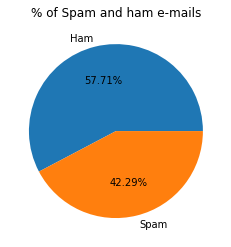

In [ ]:
plt.pie(whole_data_df_unique['label'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.2f%%')
plt.title('% of Spam and ham e-mails')
plt.show()
#we this case we can eliminate the high imbalance 

In [ ]:
label = whole_data_df_unique.pop('label')
features = whole_data_df_unique

#### @Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.3,
                                                    random_state = 42)

In [ ]:
print(r'Train size: {} Test size : {}'.format(len(x_train), len(x_test)))

Train size: 3825 Test size : 1640


In [ ]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [ ]:
x_train_scaled.shape, x_test_scaled.shape

((3825, 2034), (1640, 2034))

In [ ]:
# check if the feature found in training is also on the testing 
h = x_test.sum()
c = 0
for item in h:
    if h[c]== 0:
        print(item)
    c+=1

### Model Evaluations 

			RandomForestClassifier


<==========================Traning data performance =============================>
Random Forest Model Accuracy :  99.97385620915033 %

Confusion matrix :
[[2209    1]
 [   0 1615]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2210
           1       1.00      1.00      1.00      1615

    accuracy                           1.00      3825
   macro avg       1.00      1.00      1.00      3825
weighted avg       1.00      1.00      1.00      3825

<==========================Testing data Performance ===========================>
Random Forest Model Accuracy :  97.6829268292683 %

Confusion matrix :
[[926  18]
 [ 20 676]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       944
           1       0.97      0.97      0.97       696

    accuracy                           0.98      1640
   macro avg       0.9

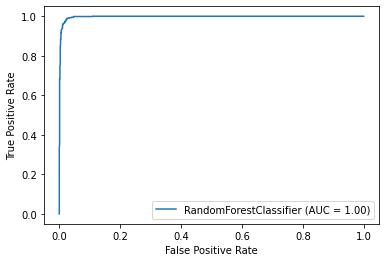

In [ ]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

RandomForest_model = RandomForestClassifier(n_estimators=200, random_state=42)
RandomForest_model.fit(x_train_scaled, y_train)
print("\t\t\tRandomForestClassifier\n\n")
print('<==========================Traning data performance =============================>')
print('Random Forest Model Accuracy : ', RandomForest_model.score(x_train_scaled, y_train)*100, '%')

prediction = RandomForest_model.predict(x_train_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_train, prediction))
      
print('\nClassification report:')      
print(classification_report(y_train, prediction))


print('<==========================Testing data Performance ===========================>')
print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_scaled, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))
print('\nTest ROC curve')
metrics.plot_roc_curve(RandomForest_model,x_test_scaled,y_test)

 1) enron                          0.043567
 2) thanks                         0.034202
 3) daren                          0.031851
 4) hpl                            0.026120
 5) meter                          0.023619
 6) gas                            0.023022
 7) deal                           0.022905
 8) attached                       0.021612
 9) cc                             0.019482
10) questions                      0.018911
11) subject                        0.015852
12) http                           0.014849
13) pm                             0.014694
14) forwarded                      0.012958
15) hou                            0.011992
16) let                            0.011753
17) mmbtu                          0.011532
18) ect                            0.010205
19) know                           0.009706
20) sitara                         0.009666
21) farmer                         0.009555
22) nom                            0.009441
23) volumes                     

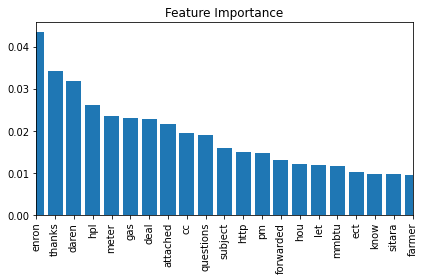

In [ ]:
#Feature importance analysis
feat_labels = x_train_scaled.columns
importances = RandomForest_model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train_scaled.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    if f == 100:
        break

plt.title('Feature Importance')
plt.bar(range(x_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train_scaled.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([0, 20])
plt.tight_layout()
plt.show()

			BernoulliNB
<==========================Traning data performance =============================>
Train Model Accuracy :  96.78431372549021 %

Confusion matrix :
[[2094  116]
 [   7 1608]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2210
           1       0.93      1.00      0.96      1615

    accuracy                           0.97      3825
   macro avg       0.96      0.97      0.97      3825
weighted avg       0.97      0.97      0.97      3825

<==========================Testing data Performance ===========================>
Test Model Accuracy :  96.70731707317073 %

Confusion matrix :
[[894  50]
 [  4 692]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       944
           1       0.93      0.99      0.96       696

    accuracy                           0.97      1640
   macro avg       0.96      0.97      0.97      16

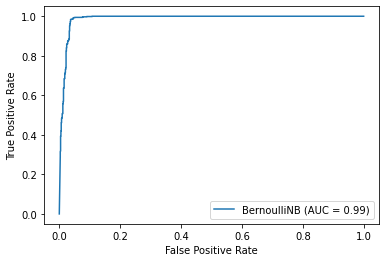

In [ ]:
#Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
NBayes_model = BernoulliNB()
NBayes_model.fit(x_train_scaled, y_train)
print("\t\t\tBernoulliNB")
print('<==========================Traning data performance =============================>')
print('Train Model Accuracy : ', NBayes_model.score(x_train_scaled, y_train)*100, '%')

y_pred_nb = NBayes_model.predict(x_train_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_train, y_pred_nb))
      
print('\nClassification report:')      
print(classification_report(y_train, y_pred_nb))


print('<==========================Testing data Performance ===========================>')
print('Test Model Accuracy : ', NBayes_model.score(x_test_scaled, y_test)*100, '%')

y_pred_nb = NBayes_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred_nb))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_nb))
print('\nROC curve')
metrics.plot_roc_curve(NBayes_model,x_test_scaled,y_test)

			BernoulliNB
<==========================Traning data performance =============================>
Train Model Accuracy :  97.41176470588235 %

Confusion matrix :
[[2112   98]
 [   1 1614]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2210
           1       0.94      1.00      0.97      1615

    accuracy                           0.97      3825
   macro avg       0.97      0.98      0.97      3825
weighted avg       0.98      0.97      0.97      3825

<==========================Testing data Performance ===========================>
Test Model Accuracy :  95.48780487804878 %

Confusion matrix :
[[899  45]
 [ 29 667]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       944
           1       0.94      0.96      0.95       696

    accuracy                           0.95      1640
   macro avg       0.95      0.96      0.95      16

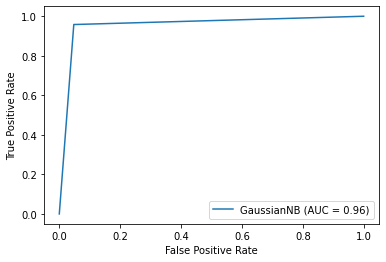

In [ ]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
GNBayes_model = GaussianNB()
GNBayes_model.fit(x_train_scaled, y_train)
print("\t\t\tBernoulliNB")
print('<==========================Traning data performance =============================>')
print('Train Model Accuracy : ', GNBayes_model.score(x_train_scaled, y_train)*100, '%')

y_pred_nb = GNBayes_model.predict(x_train_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_train, y_pred_nb))
      
print('\nClassification report:')      
print(classification_report(y_train, y_pred_nb))


print('<==========================Testing data Performance ===========================>')
print('Test Model Accuracy : ', GNBayes_model.score(x_test_scaled, y_test)*100, '%')

y_pred_nb = GNBayes_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred_nb))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_nb))
print('\nROC curve')
metrics.plot_roc_curve(GNBayes_model,x_test_scaled,y_test)

### Comparision of AUC(area under the ROC curve) of Randomforest and Naivebayes for training and testing data

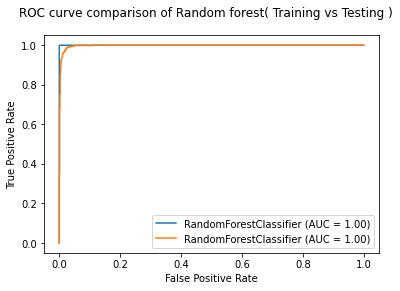

In [ ]:
#Random forest
fig = metrics.plot_roc_curve(RandomForest_model, x_train_scaled, y_train)
fig = metrics.plot_roc_curve(RandomForest_model, x_test_scaled, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison of Random forest( Training vs Testing )")
plt.show() #Training AUC = 1.0, Testing AUC = 0.99

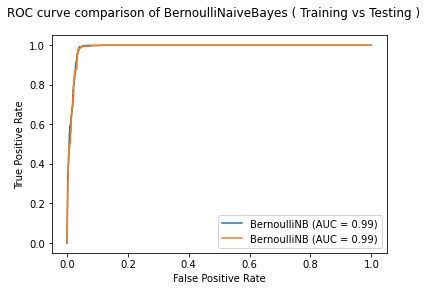

In [ ]:
#BernoulliNaiveBayes
fig = metrics.plot_roc_curve(NBayes_model, x_train_scaled, y_train)
fig = metrics.plot_roc_curve(NBayes_model, x_test_scaled, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison of BernoulliNaiveBayes ( Training vs Testing )")
plt.show() #Training AUC = 0.98, Testing AUC = 0.98

### To evaluate and compare their performance using testset

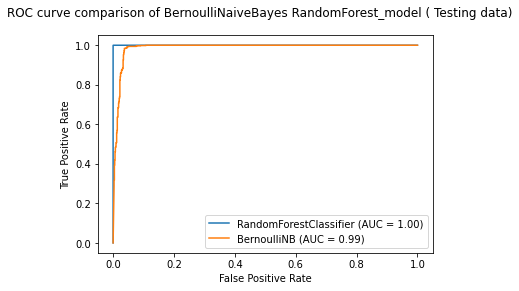

In [ ]:
#BernoulliNaiveBayes
fig = metrics.plot_roc_curve(RandomForest_model, x_train_scaled, y_train)
fig = metrics.plot_roc_curve(NBayes_model, x_test_scaled, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison of BernoulliNaiveBayes RandomForest_model ( Testing data)")
plt.show() 